In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten

In [3]:
# Load the dataset
df = pd.read_csv('AAPL.csv')
print('Initial dataset:')
print(df.head())

Initial dataset:
         Date      Open      High       Low     Close  Adj Close     Volume
0  1980/12/12  0.128348  0.128906  0.128348  0.128348   0.099319  469033600
1  1980/12/15  0.122210  0.122210  0.121652  0.121652   0.094137  175884800
2  1980/12/16  0.113281  0.113281  0.112723  0.112723   0.087228  105728000
3  1980/12/17  0.115513  0.116071  0.115513  0.115513   0.089387   86441600
4  1980/12/18  0.118862  0.119420  0.118862  0.118862   0.091978   73449600


In [4]:
# Convert 'Date' column to datetime format and set it as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [5]:
# Extract the 'Close' column for further analysis
closing_prices = df.filter(['Close']).values

In [6]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(closing_prices)

In [7]:
# Prepare training data
train_data = scaled_prices[:int(len(scaled_prices) * 0.95), :]
x_train, y_train = [], []

In [8]:
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)

In [9]:
# Build the model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(60, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))

In [10]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [11]:
# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
320/320 [==============================] - 17s 36ms/step - loss: 2.6683e-04
Epoch 2/10
320/320 [==============================] - 19s 58ms/step - loss: 8.2247e-05
Epoch 3/10
320/320 [==============================] - 15s 48ms/step - loss: 6.8063e-05
Epoch 4/10
320/320 [==============================] - 11s 33ms/step - loss: 4.5748e-05
Epoch 5/10
320/320 [==============================] - 10s 31ms/step - loss: 4.4735e-05
Epoch 6/10
320/320 [==============================] - 10s 33ms/step - loss: 3.4930e-05
Epoch 7/10
320/320 [==============================] - 11s 33ms/step - loss: 3.1596e-05
Epoch 8/10
320/320 [==============================] - 11s 33ms/step - loss: 2.8165e-05
Epoch 9/10
320/320 [==============================] - 10s 33ms/step - loss: 3.3249e-05
Epoch 10/10
320/320 [==============================] - 10s 30ms/step - loss: 2.3729e-05


In [12]:
# Prepare testing data
test_data = scaled_prices[int(len(scaled_prices) * 0.95) - 60:, :]
x_test, y_test = [], closing_prices[int(len(closing_prices) * 0.95):, :]

In [13]:
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [14]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

17/17 [==============================] - 1s 11ms/step


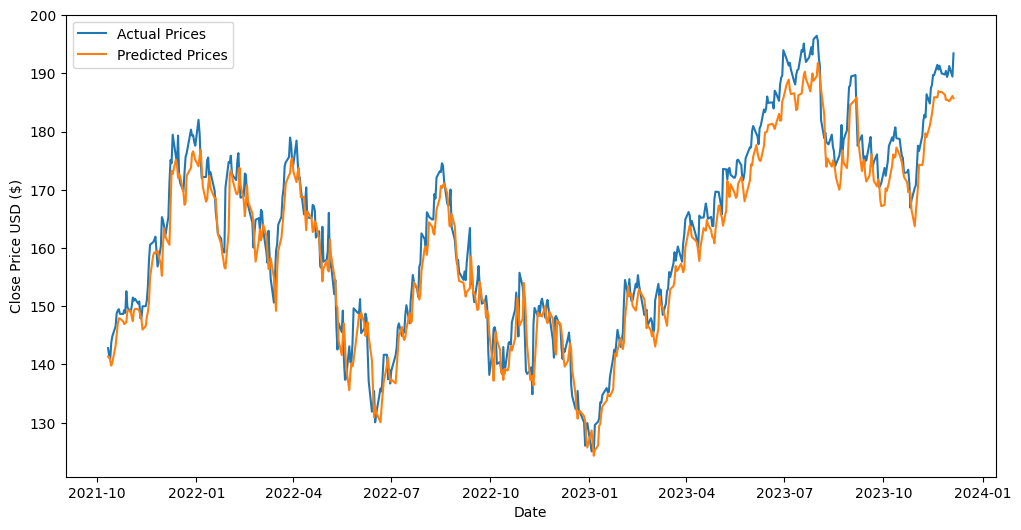

In [15]:
# Visualize the predicted prices compared to actual prices
plt.figure(figsize=(12, 6))
# plt.title('Stock Price Prediction using ConvLSTM')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(df.index[-len(y_test):], y_test, label='Actual Prices')
plt.plot(df.index[-len(y_test):], predictions, label='Predicted Prices')
plt.legend()
plt.savefig('Stock Price Prediction using CNN')
plt.show()

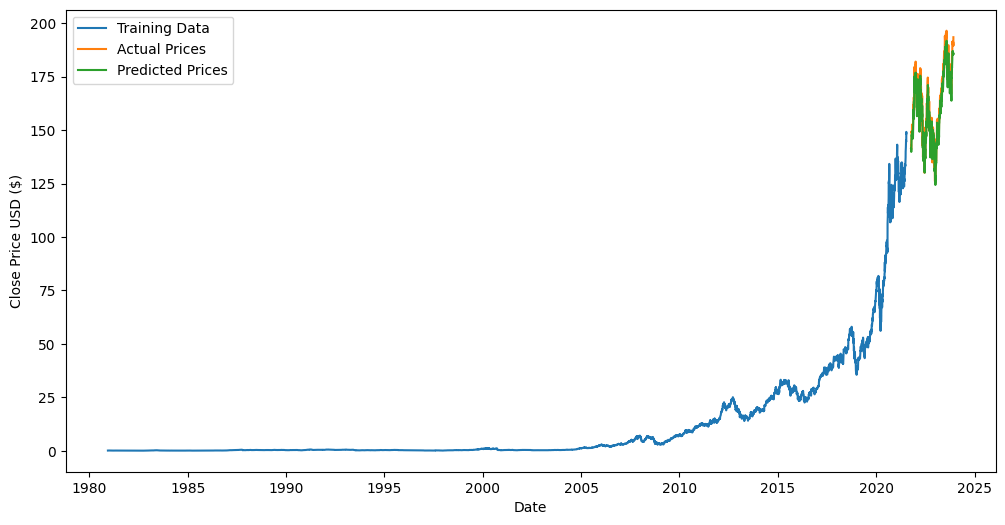

In [16]:
# Visualize the predicted prices compared to actual prices
plt.figure(figsize=(12, 6))
# plt.title('Stock Price Prediction using ConvLSTM')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')

plt.plot(df.index[:len(x_train)], closing_prices[:len(x_train)], label='Training Data')
plt.plot(df.index[-len(y_test):], y_test, label='Actual Prices')
plt.plot(df.index[-len(predictions):], predictions, label='Predicted Prices')

plt.legend()
plt.savefig('Stock Price Trend using CNN')
plt.show()

In [17]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print('CNN Model Evaluation:')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R2 Score: {r2:.2f}')

CNN Model Evaluation:
MSE: 17.36
RMSE: 4.17
MAE: 3.41
R2 Score: 0.94
